In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D



In [9]:
data=pd.read_csv(r'Customer_Data.csv')

data.head(5)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [13]:
data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [16]:
data [data["ONEOFF_PURCHASES"] == 40761.25]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
550,C10574,11547.52001,1.0,49039.57,40761.25,8278.32,558.166886,1.0,1.0,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.25,12


In [18]:
data["BALANCE"].max()

19043.13856

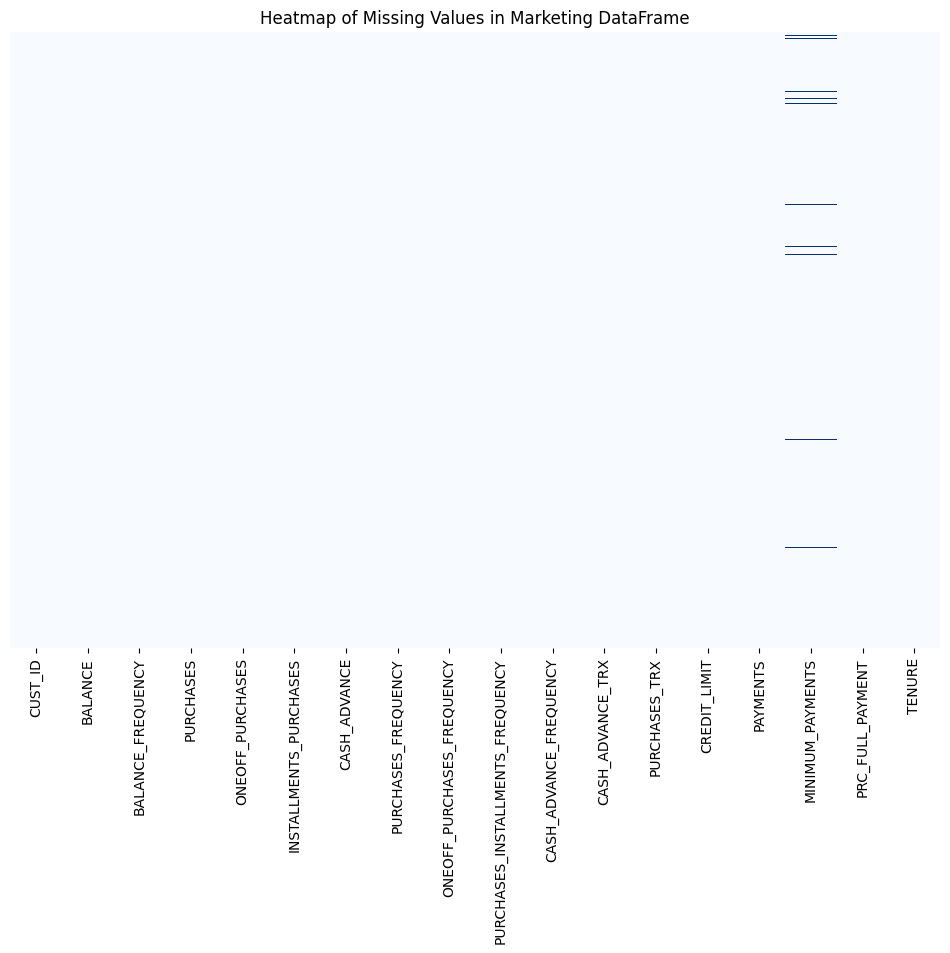

In [23]:
plt.figure(figsize=(12, 8))  # Optional: Adjust the figure size for better visibility
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap="Blues")
plt.title('Heatmap of Missing Values in Marketing DataFrame')
plt.show()

In [24]:
data.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [27]:
data['MINIMUM_PAYMENTS'].fillna(data['MINIMUM_PAYMENTS'].mean(), inplace=True)



In [29]:
mean_value = data['MINIMUM_PAYMENTS'].mean()
data.loc[data['MINIMUM_PAYMENTS'].isnull(), 'MINIMUM_PAYMENTS'] = mean_value



In [33]:
# Fill up the missing elements for credit limit
data.loc[data['CREDIT_LIMIT'].isnull(), 'CREDIT_LIMIT'] = data['CREDIT_LIMIT'].mean()


In [34]:
data.duplicated().sum()

0

In [35]:
data.drop("CUST_ID", axis =1,inplace = True)

In [36]:
data.head(5)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [38]:
n = len (data.columns)
n

17

C:\Users\sam\AppData\Local\Temp\ipykernel_3004\999475206.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col].dropna(), kde_kws={"color": "b", "lw": 3, "label": "KDE"}, hist_kws={"color": "g"})
c:\Users\sam\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sam\AppData\Local\Temp\ipykernel_3004\999475206.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to 

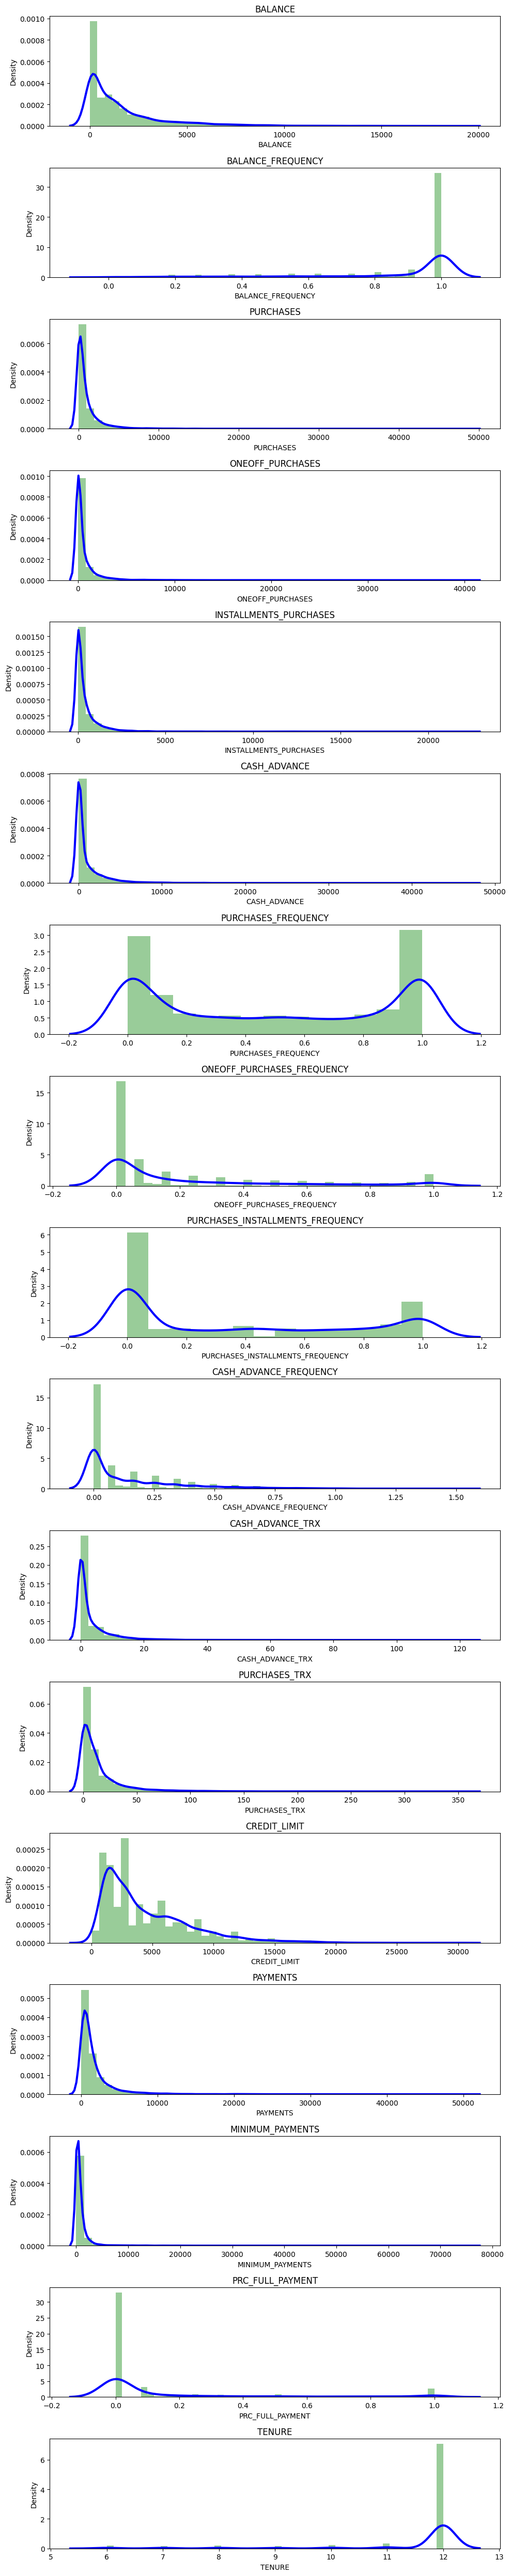

In [40]:
plt.figure(figsize=(10, 50))

# Loop through each column in Mdata DataFrame
for i, col in enumerate(data.columns):
    plt.subplot(len(data.columns), 1, i+1)
    sns.distplot(data[col].dropna(), kde_kws={"color": "b", "lw": 3, "label": "KDE"}, hist_kws={"color": "g"})
    plt.title(col)
    plt.tight_layout()

plt.show()

In [41]:
correlations = data.corr()

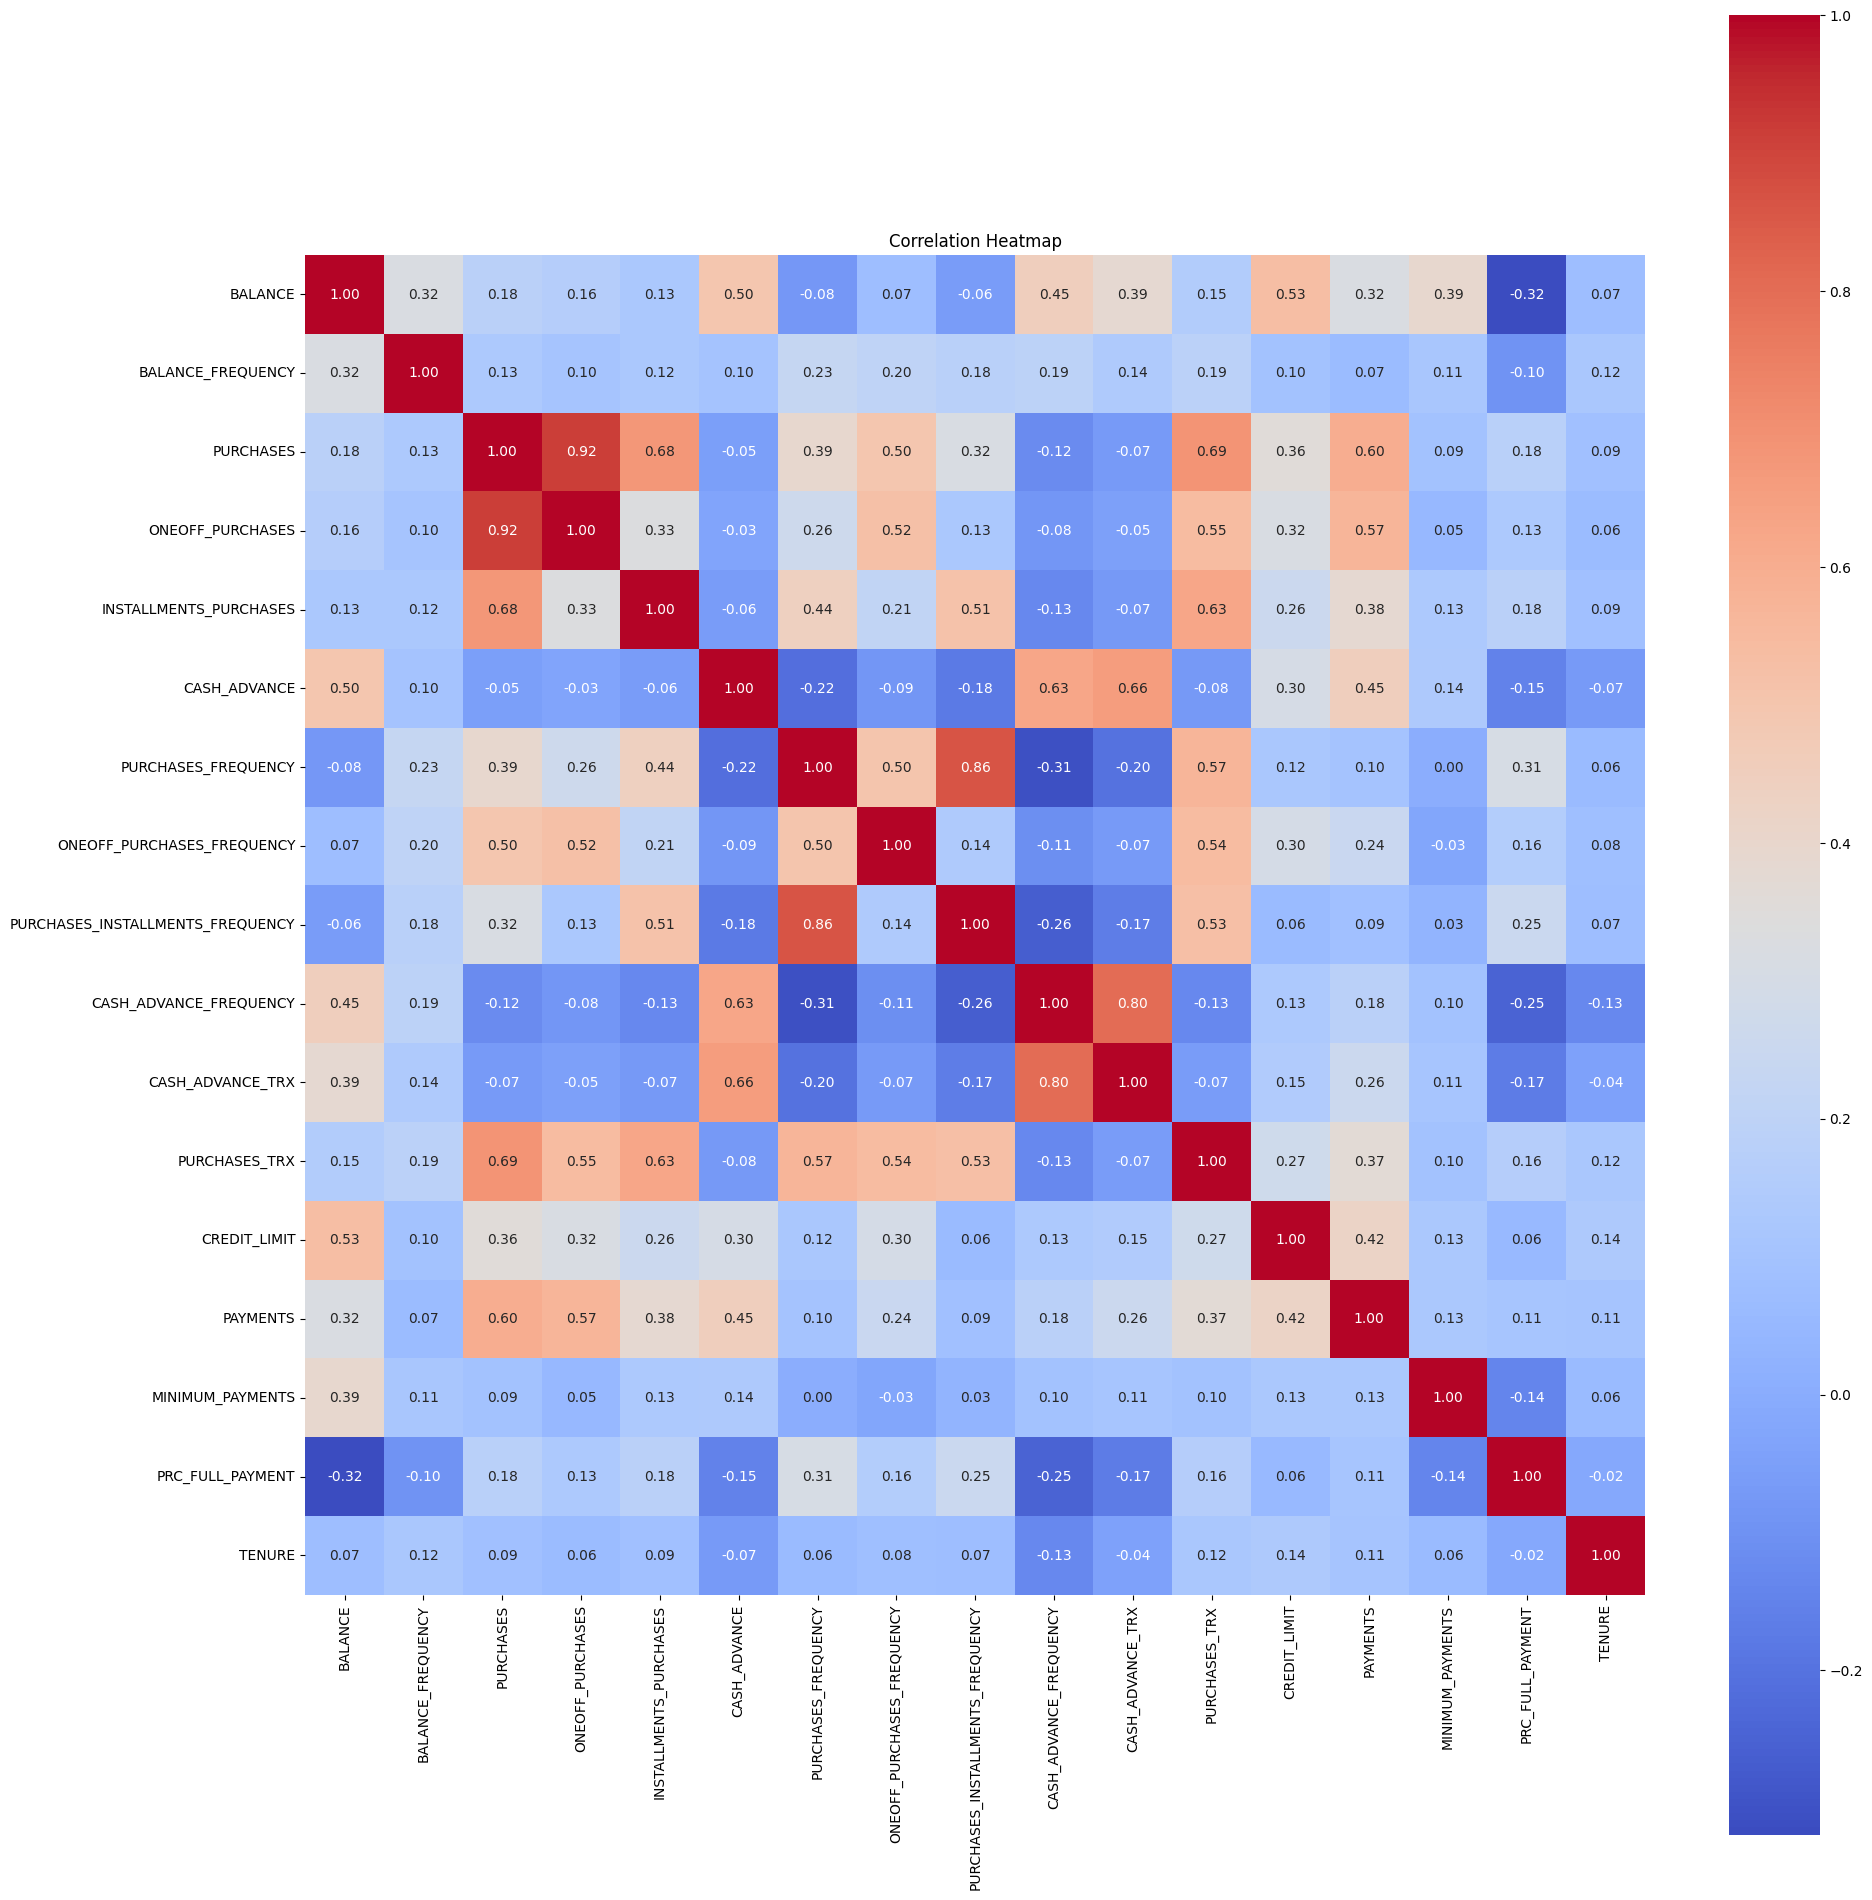

In [42]:
plt.figure(figsize=(20, 20))
# Create a heatmap with annotations
sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt='.2f', square=True)

# Optionally, you can set various parameters to enhance the visualization
plt.title('Correlation Heatmap')
plt.tight_layout()

# If using subplots, use the following instead of plt.tight_layout()
# f.tight_layout()

plt.show()

In [46]:

# Initialize the StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [48]:
data_scaled.shape

(8950, 17)

In [49]:
data_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

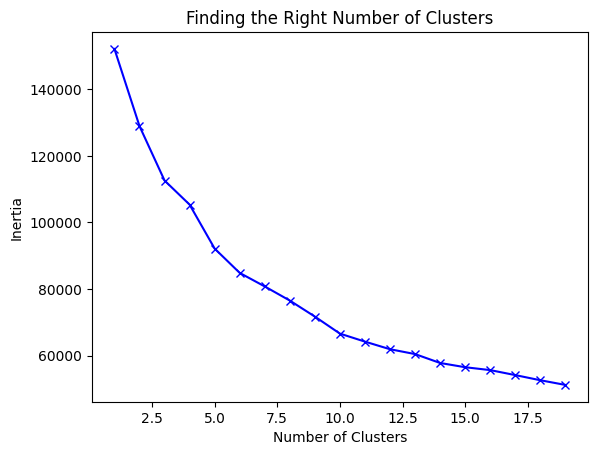

In [55]:
scores_1 = []

range_values = range(1, 20)

# Fit KMeans for each number of clusters and store the inertia
for i in range_values:
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(data_scaled)
    scores_1.append(kmeans.inertia_)

# Plot the inertia scores to find the elbow point
plt.plot(range_values, scores_1, 'bx-')
plt.title('Finding the Right Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [59]:
kmeans = KMeans(8)
kmeans.fit (data_scaled)
labels = kmeans.labels_

In [60]:
kmeans.cluster_centers_.shape

(8, 17)

In [61]:
# Create a DataFrame from the cluster centers
cluster_centers = pd.DataFrame(data=kmeans.cluster_centers_, columns=data.columns)

# Display the cluster centers
print(cluster_centers)

    BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0 -0.107359           0.395083  -0.335567         -0.217041   
1 -0.387783           0.330445  -0.037502         -0.233234   
2  1.431253           0.416012  -0.297655         -0.216734   
3  1.443847           0.414656   7.093187          6.244031   
4 -0.701609          -2.142081  -0.306682         -0.230289   
5 -0.347471          -0.355137  -0.285899         -0.211376   
6  0.127557           0.430239   0.959529          0.906969   
7  1.720150           0.323871   0.098339          0.068371   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0               -0.394577     -0.189357            -0.774949   
1                0.339654     -0.373660             0.998059   
2               -0.305669      1.157498            -0.616769   
3                5.297641      0.004274             1.081960   
4               -0.301947     -0.322381            -0.547263   
5               -0.287301      0.054675         

In [62]:
labels.shape

(8950,)

In [63]:
labels.max()

7

In [64]:
labels.min()

0

In [69]:
optimal_k = 4  # Replace with the actual optimal number found

# Initialize and fit KMeans
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(data_scaled)

# Predict cluster labels
y_kmeans = kmeans.predict(data_scaled)

# Display the cluster labels
print(y_kmeans)

[3 0 2 ... 1 3 1]


In [72]:
import pandas as pd

# Assuming 'y_kmeans' contains the cluster labels
labels = pd.DataFrame({'cluster': y_kmeans})

# Concatenate the original Marketing DataFrame with the cluster labels
data_cluster = pd.concat([data, labels], axis=1)

# Display the first few rows of the resulting DataFrame
data_cluster.head()


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,3
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,2
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,3
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,3


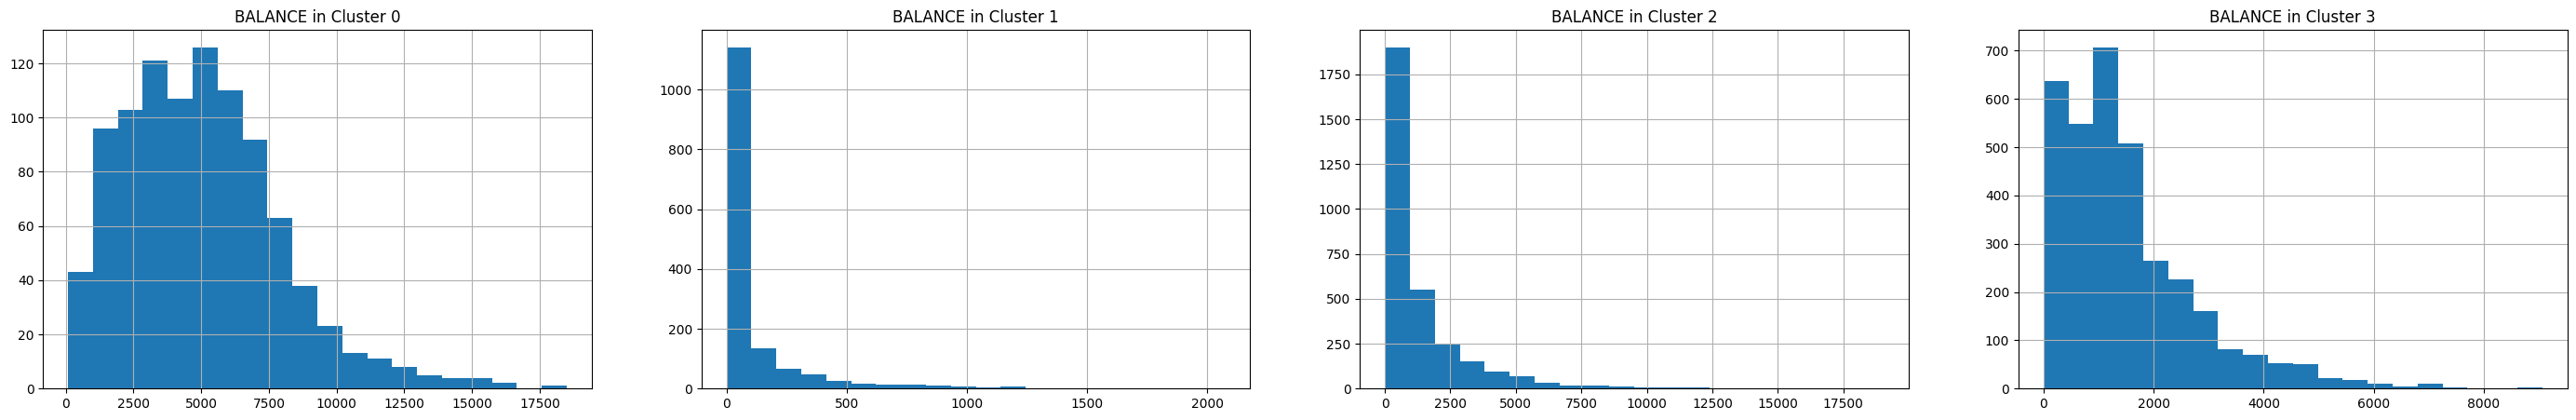

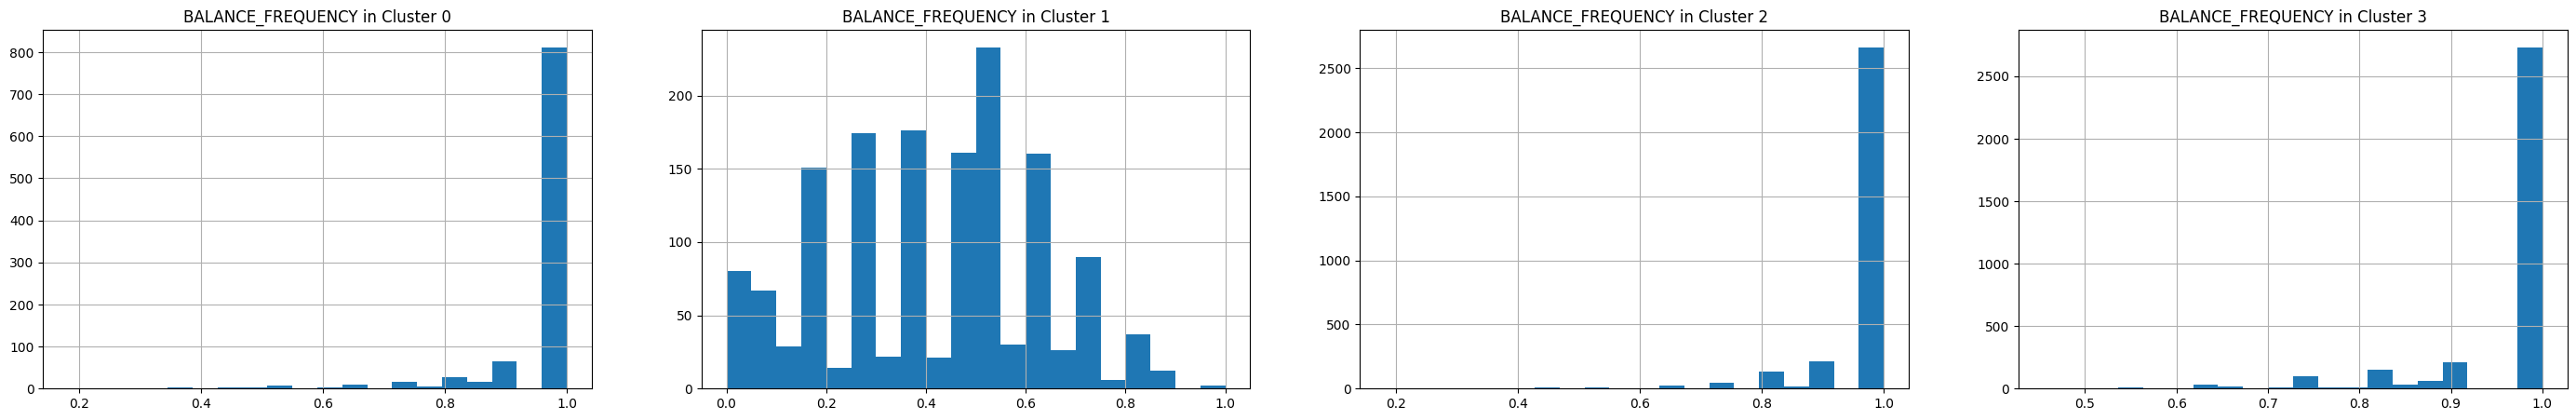

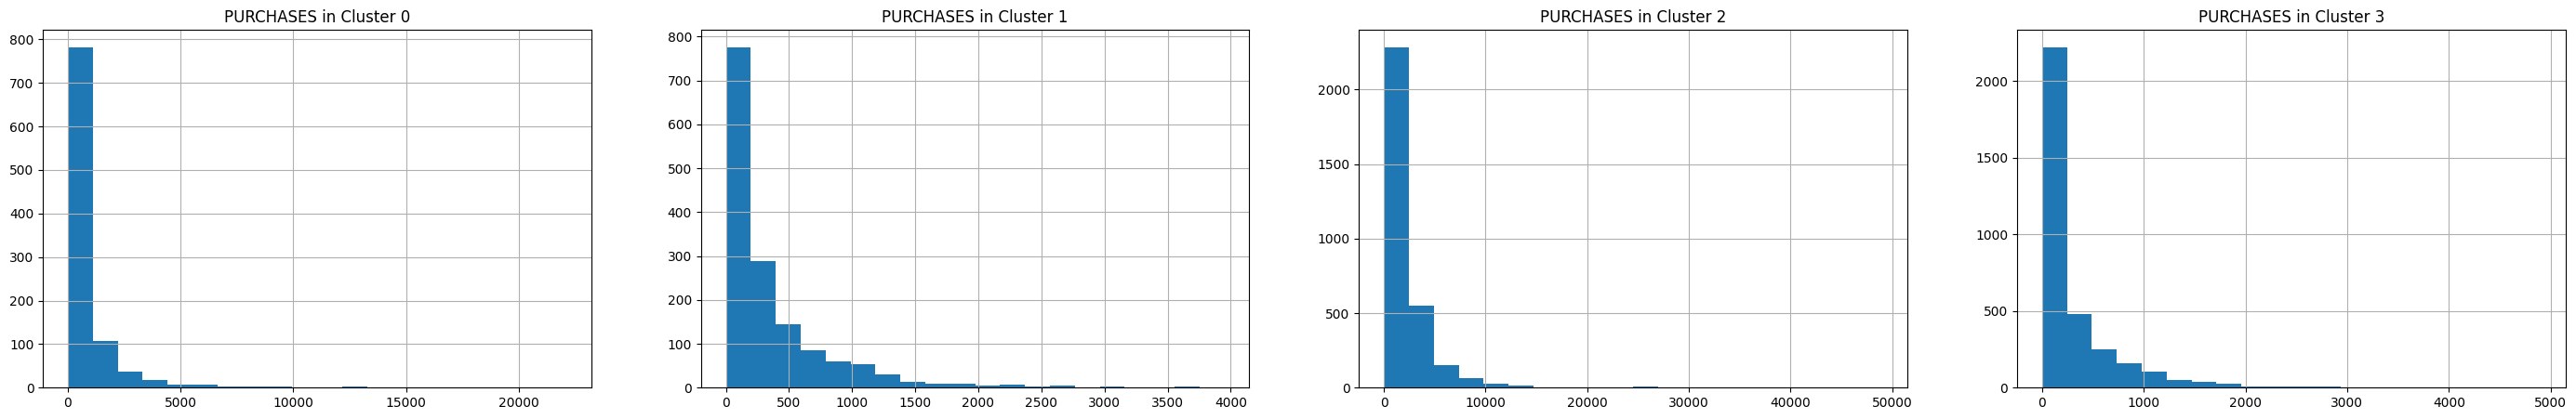

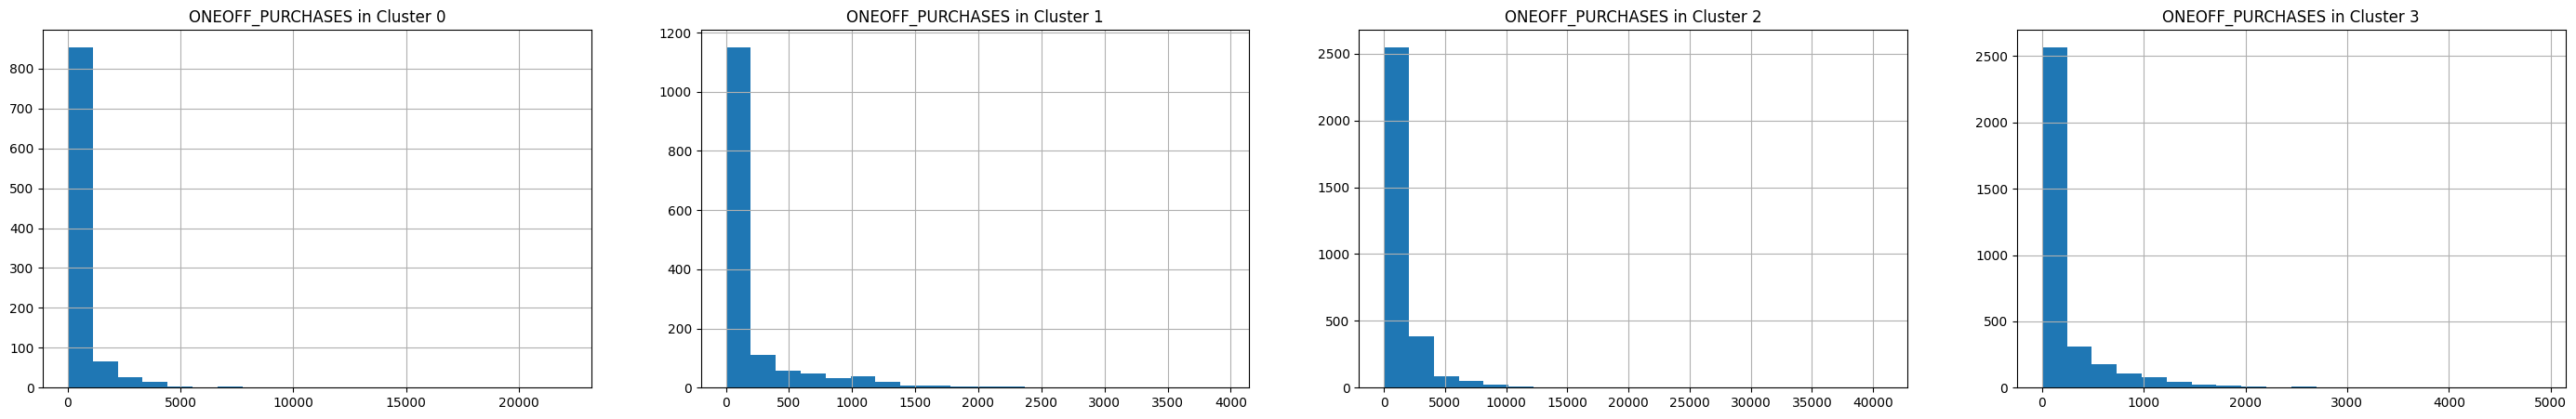

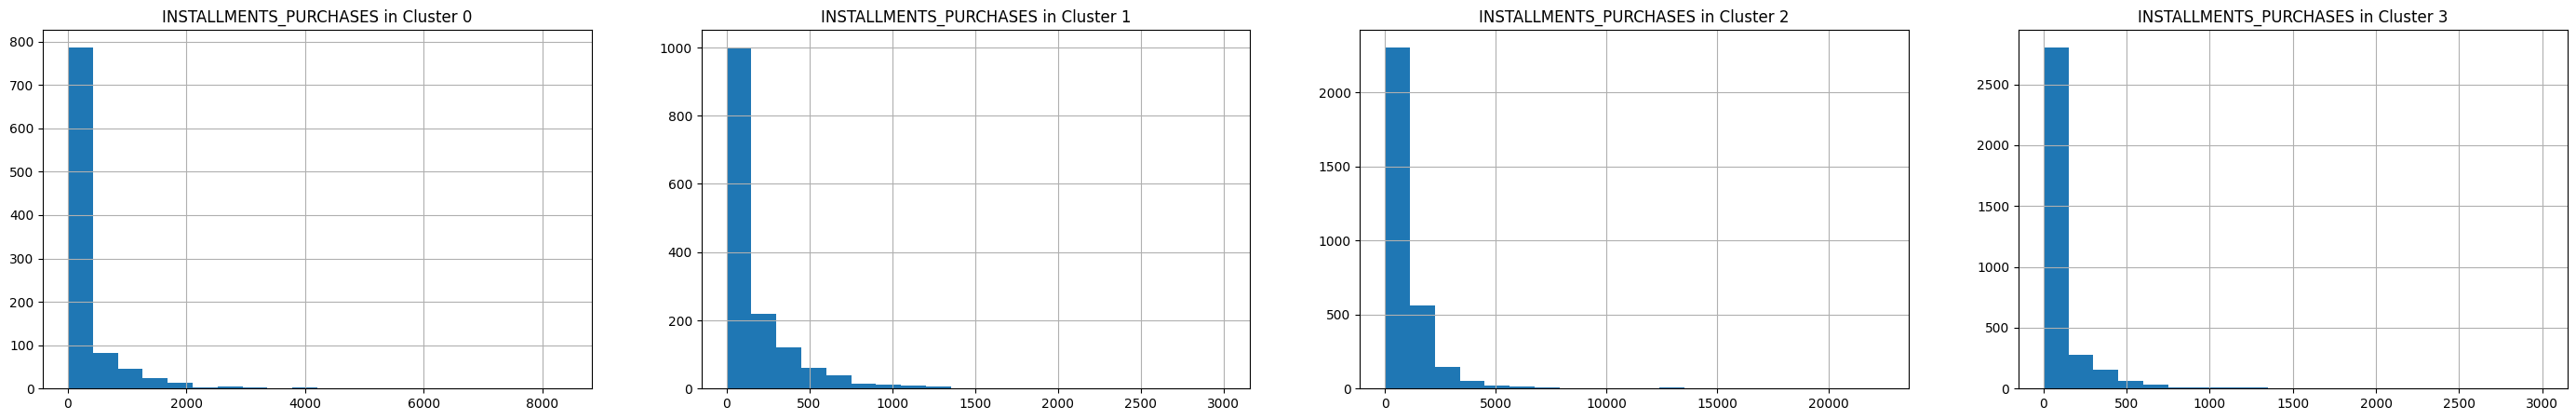

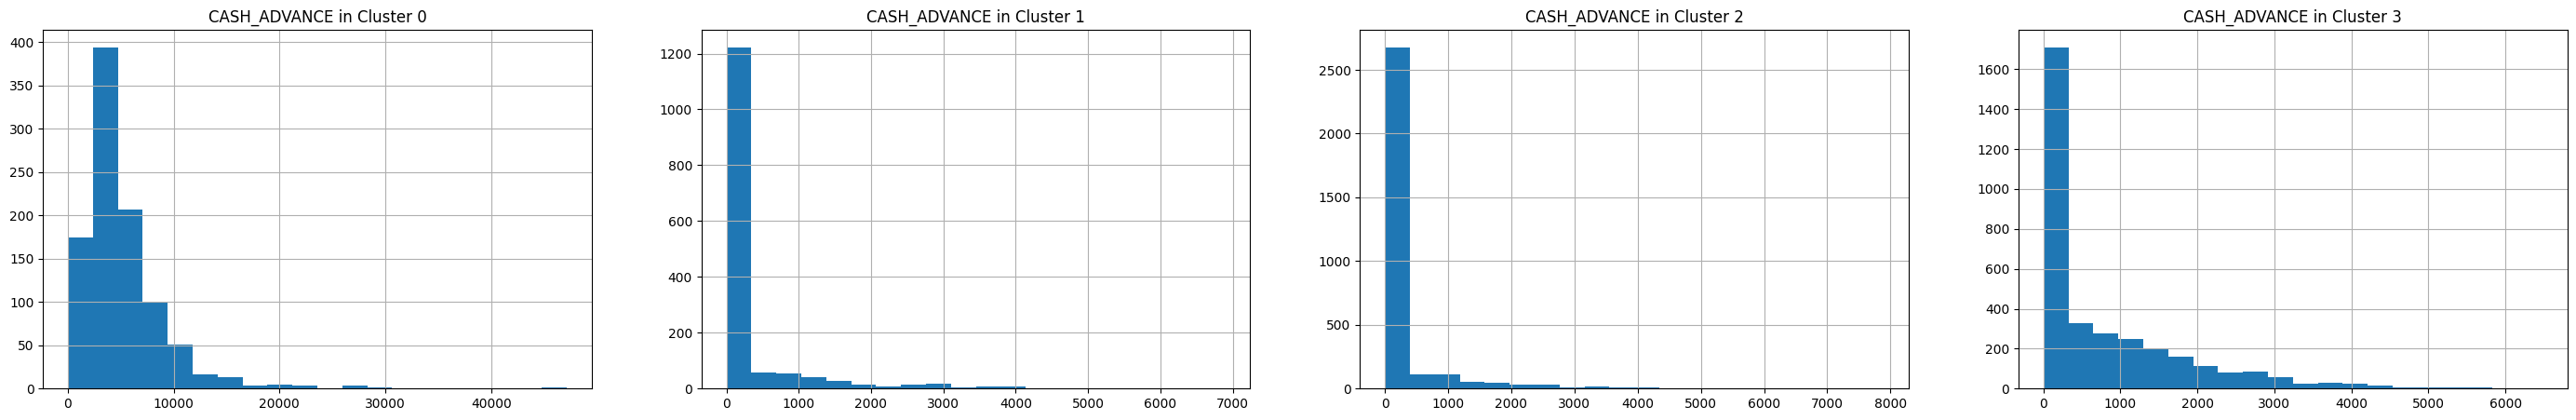

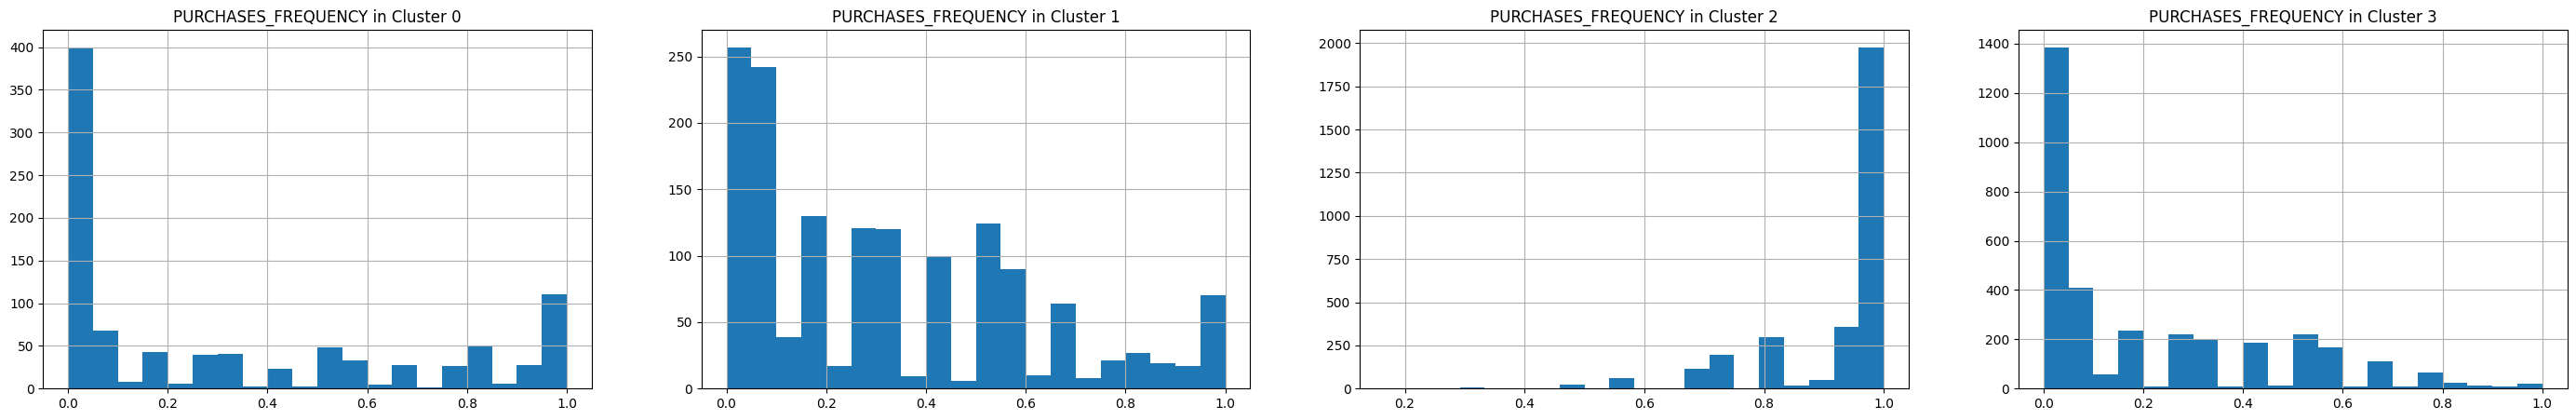

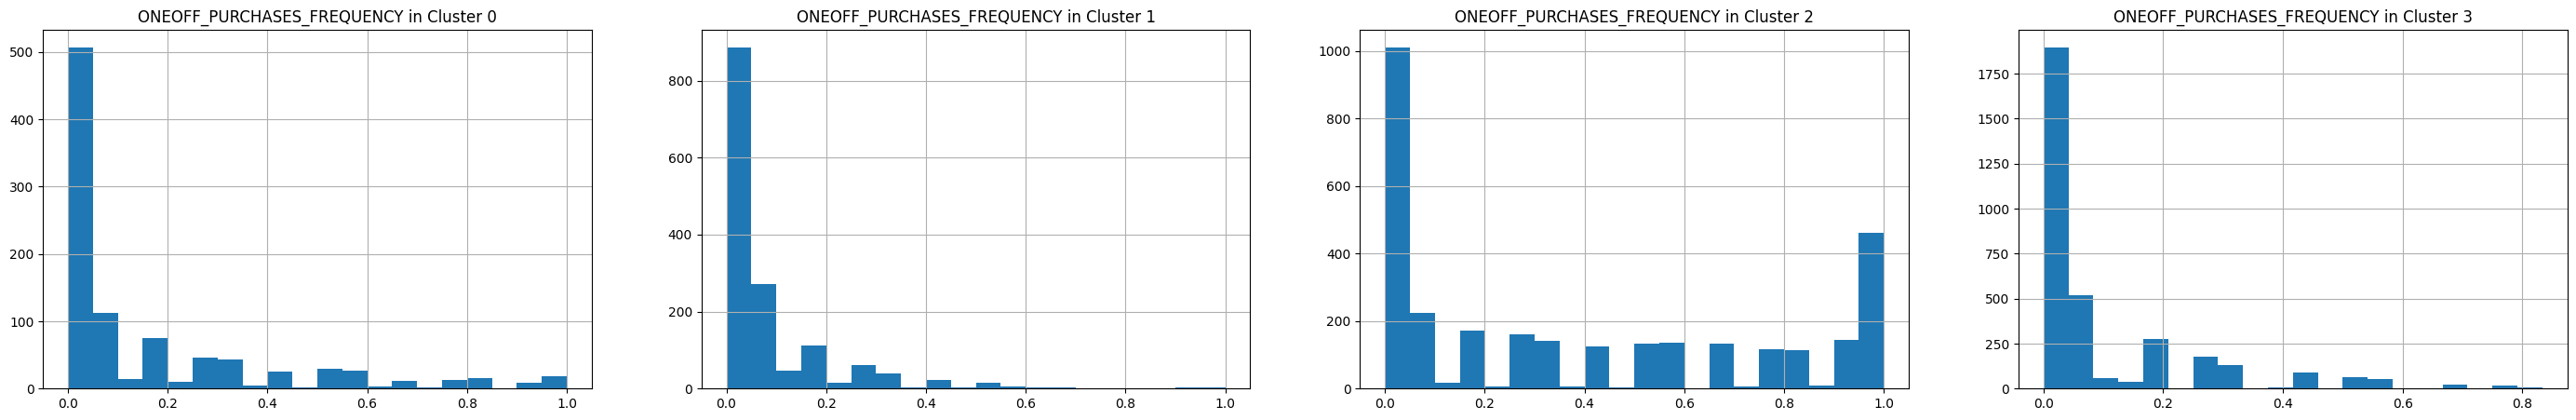

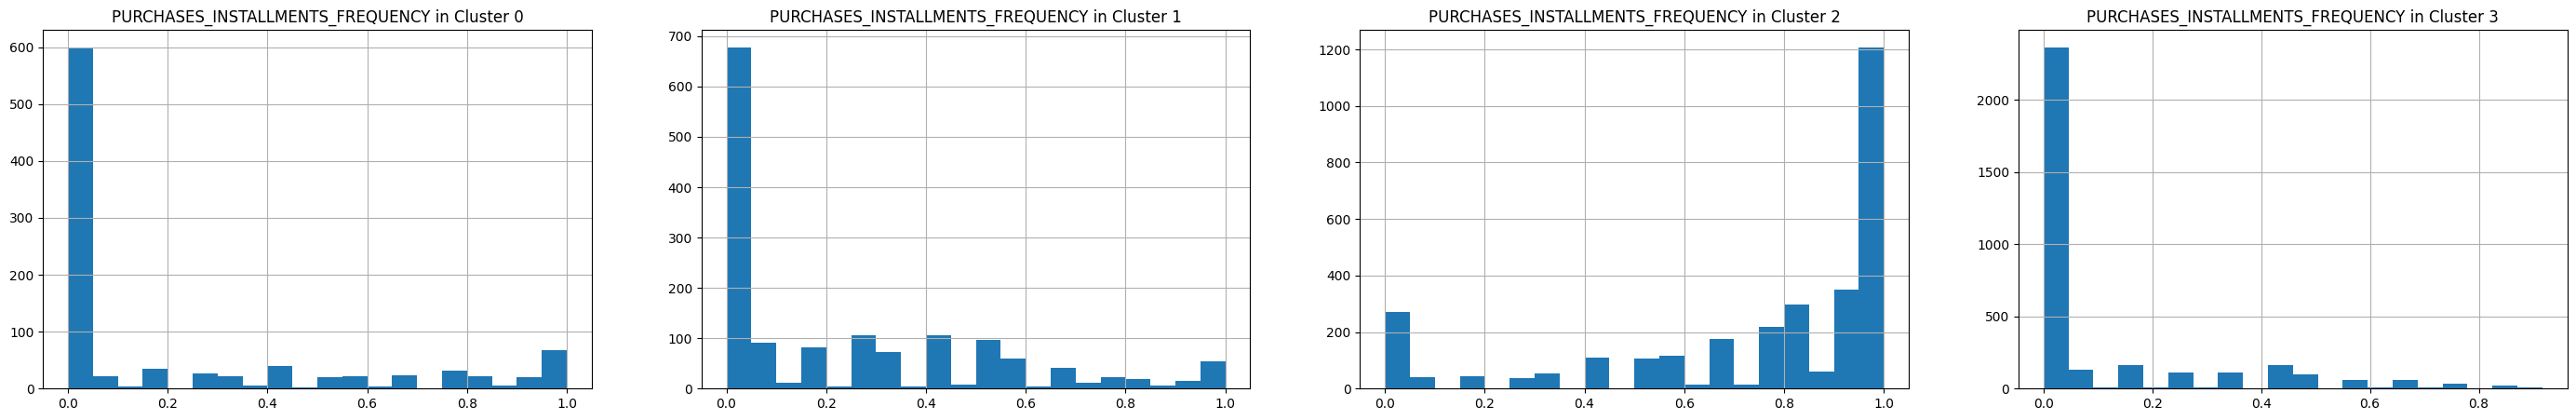

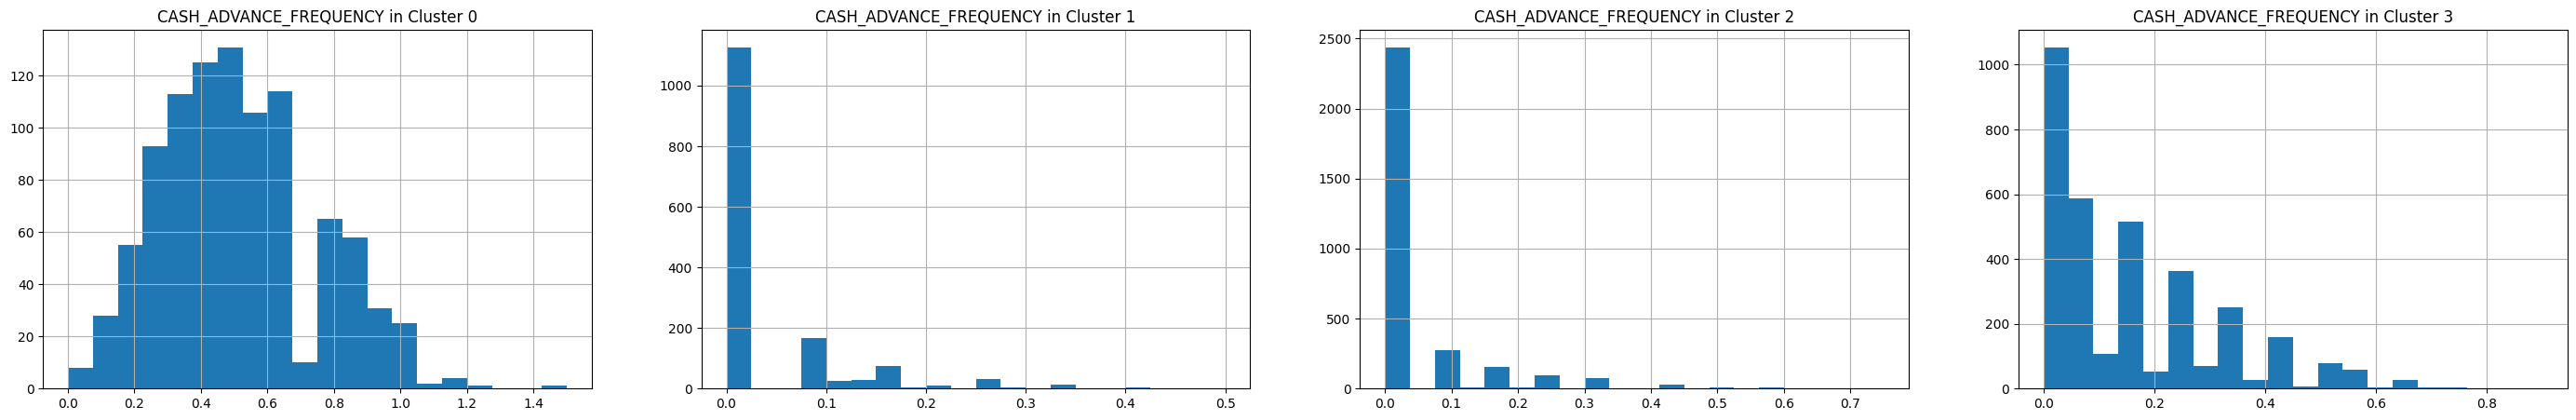

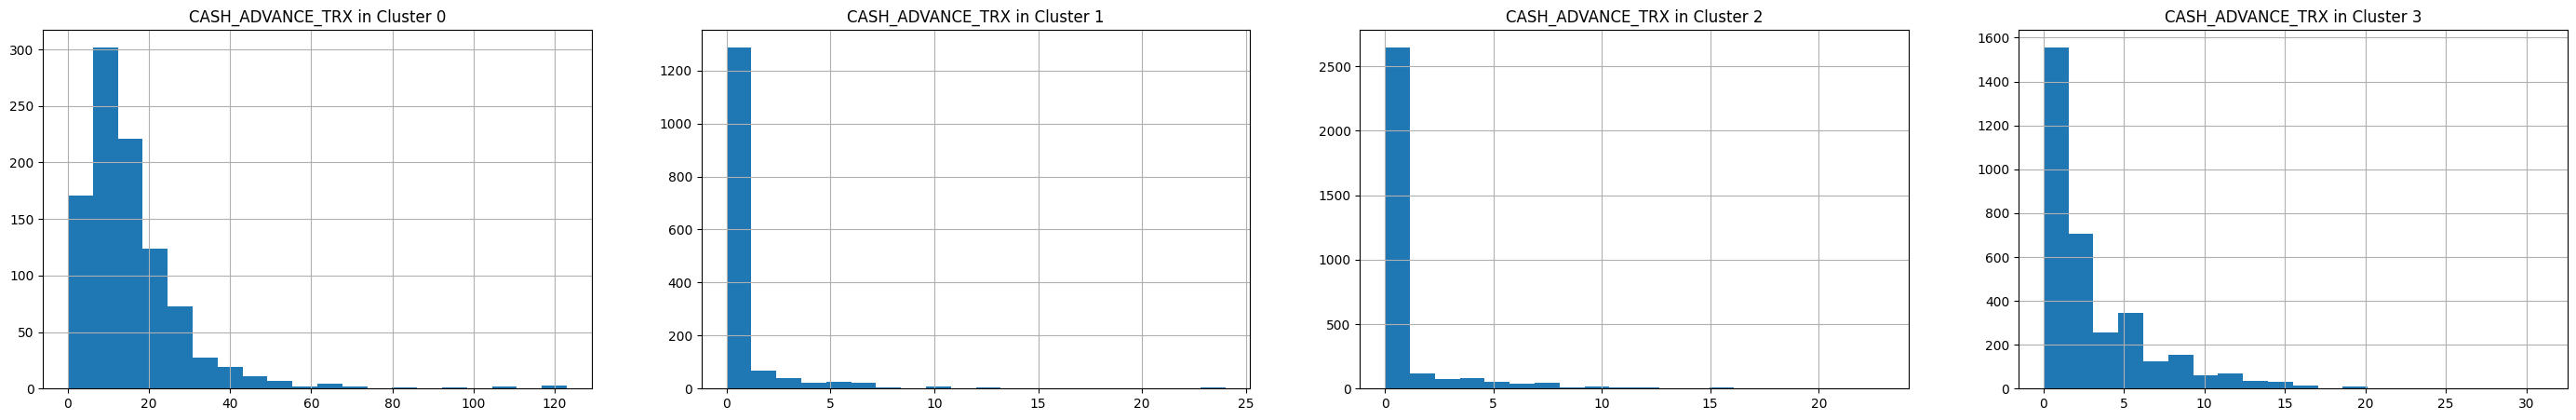

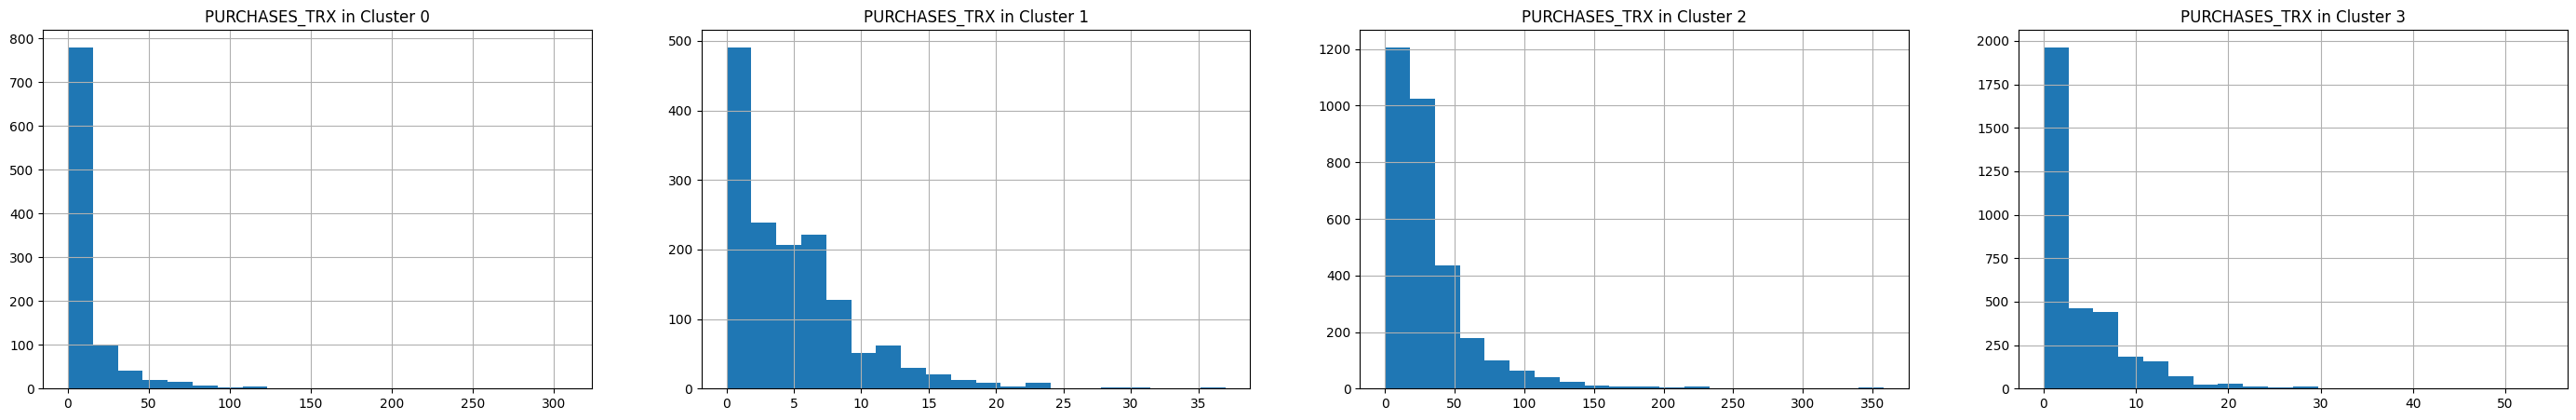

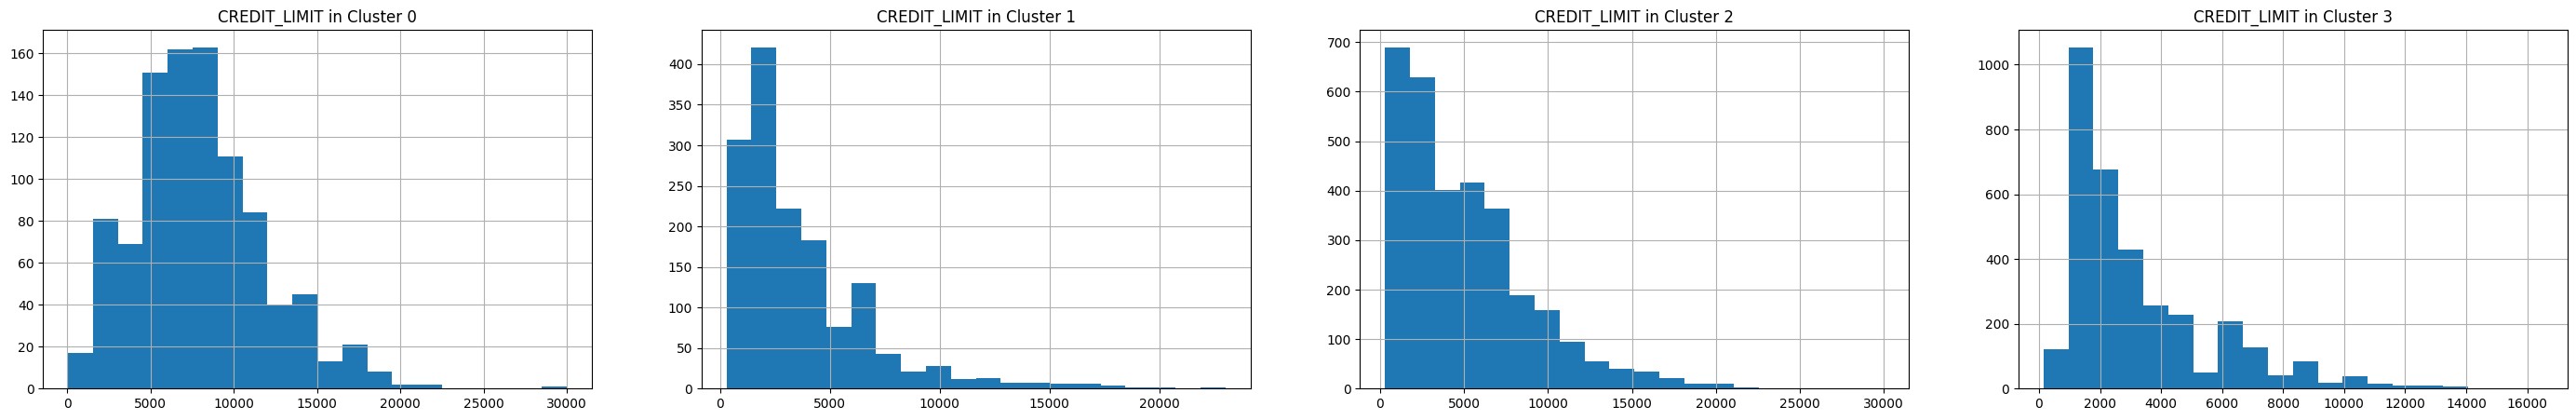

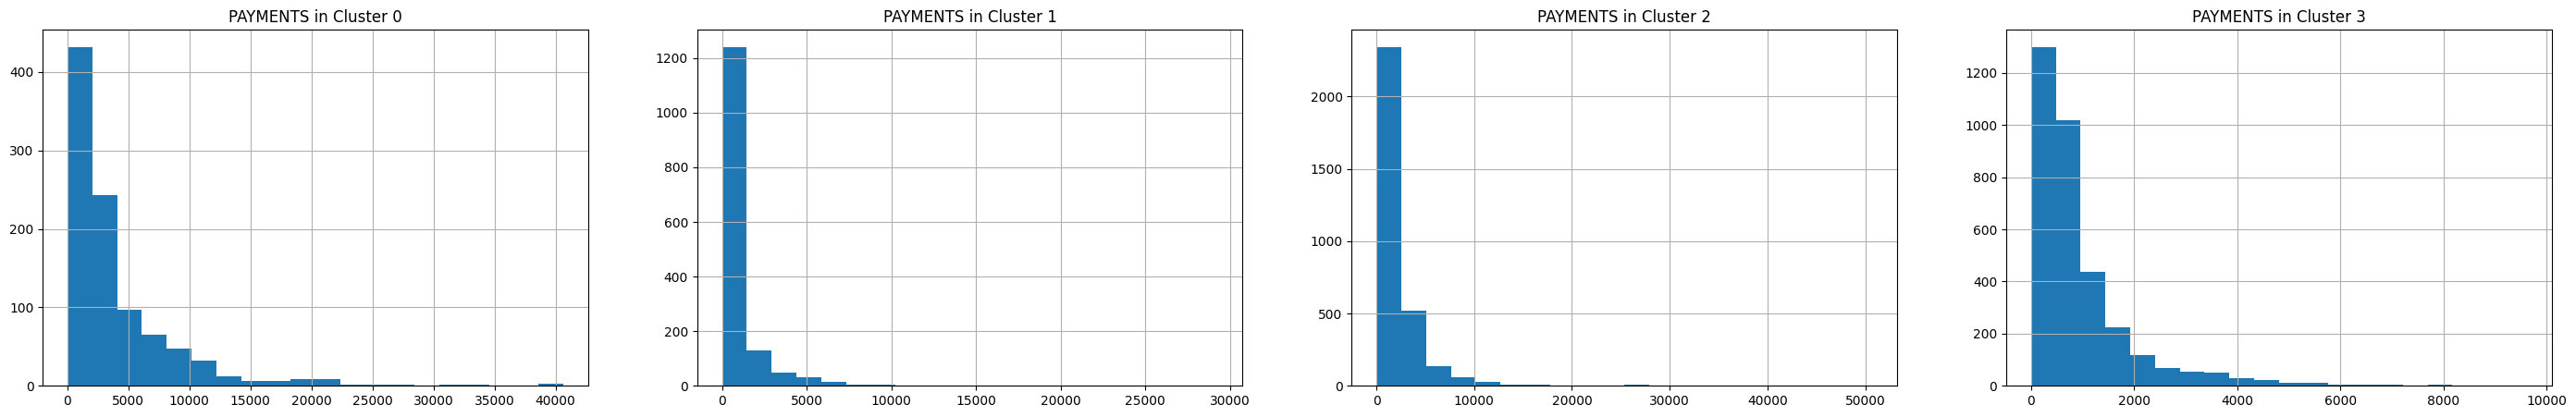

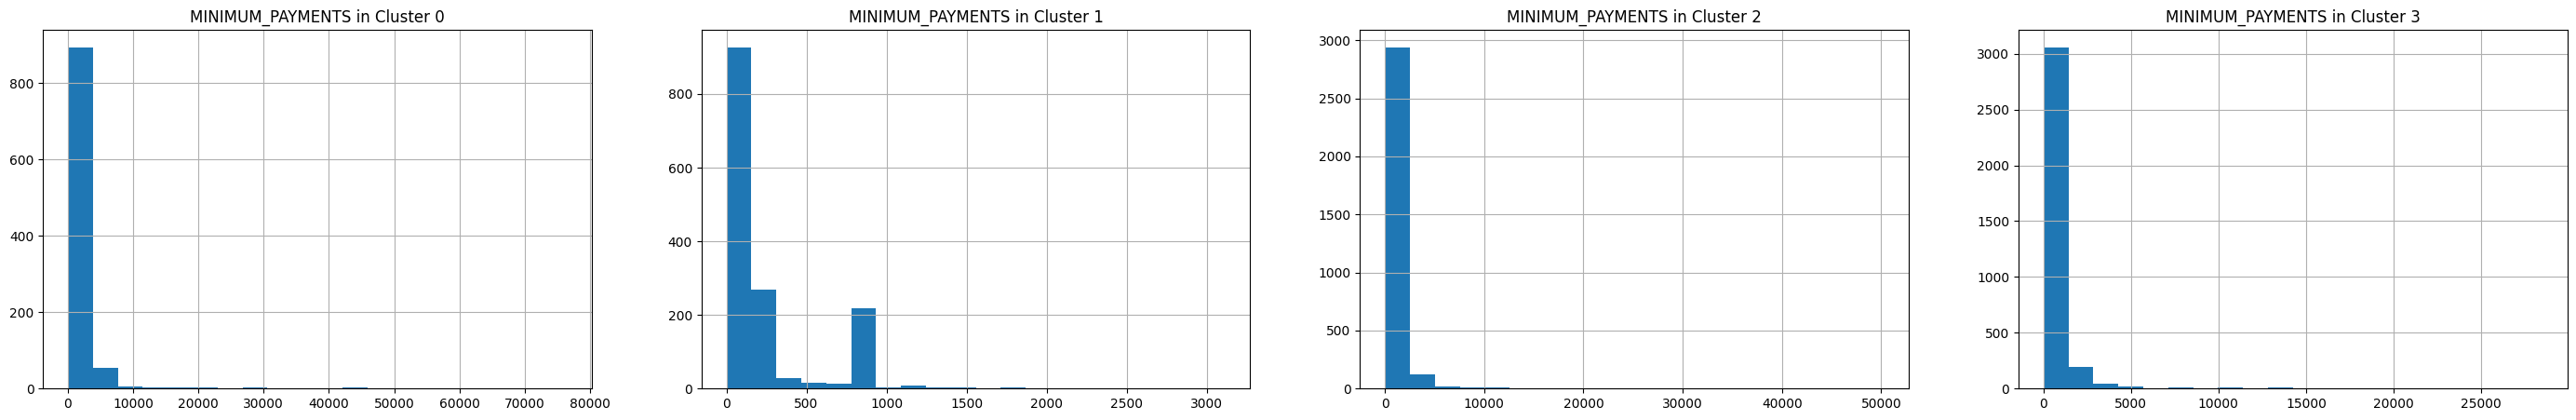

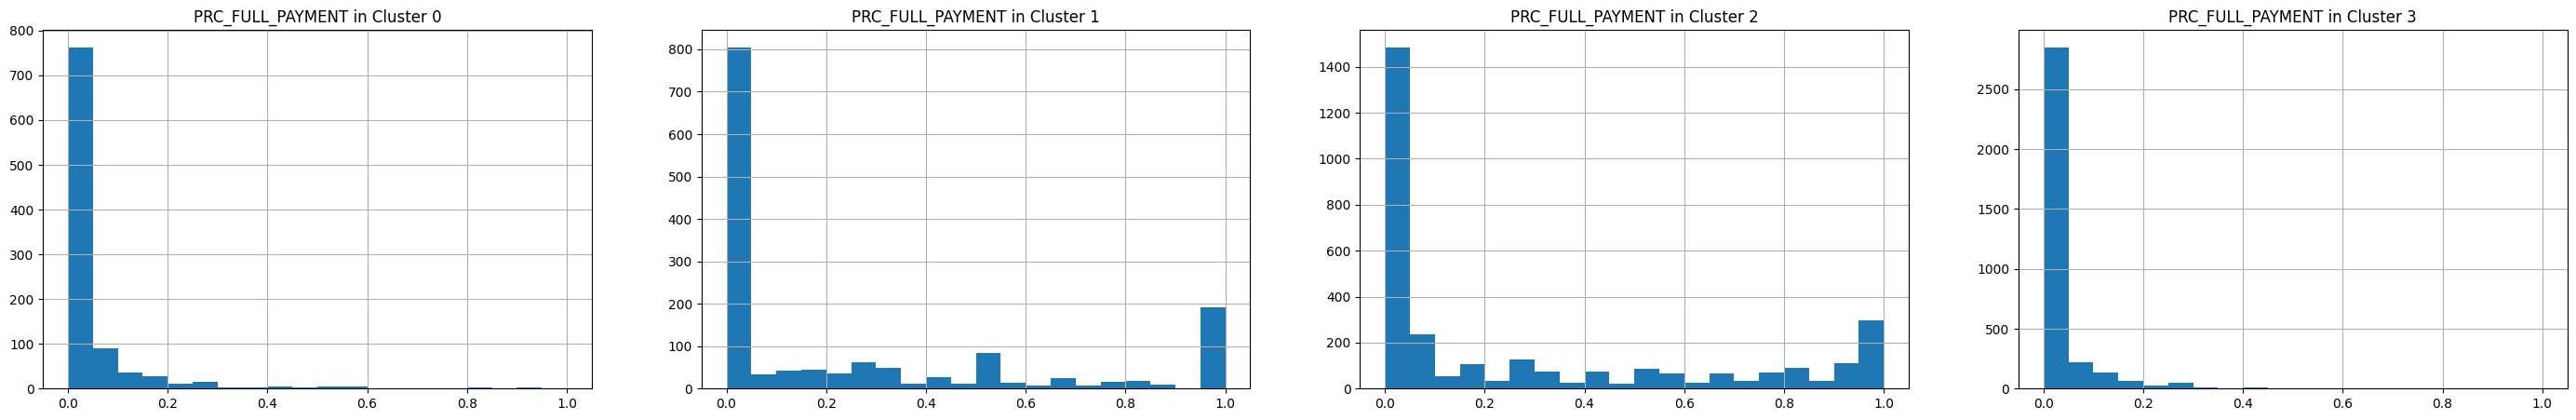

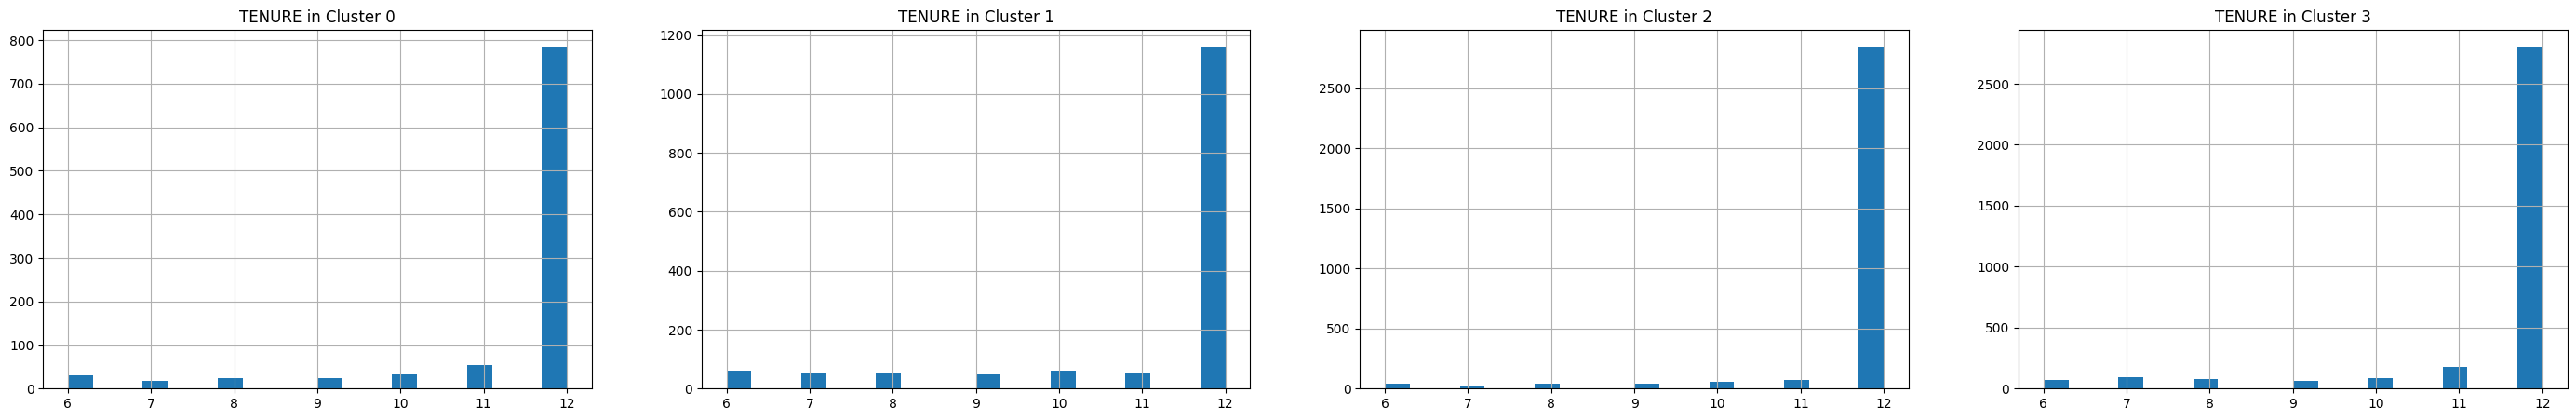

In [73]:
# Plot the histogram of various clusters
for i in data.columns:
    plt.figure(figsize=(35, 5))
    for j in range(optimal_k):  # optimal_k should be replaced with the number of clusters you have
        plt.subplot(1, optimal_k, j+1)
        cluster = data_cluster[data_cluster['cluster'] == j]
        cluster[i].hist(bins=20)
        plt.title(f'{i} in Cluster {j}')
    plt.show()

In [77]:
# Calculate silhouette score (optional)
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(data_scaled, y_kmeans)
print(f'Silhouette Score for {optimal_k} clusters: {silhouette_avg}')

Silhouette Score for 4 clusters: 0.16639208656701637


In [78]:
import pickle

# Save the model to a file
with open('kmeans_model.pkl', 'wb') as file:
    pickle.dump(kmeans, file)

# Optionally, save the scaler if you need to transform new data in the same way
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)


In [80]:
# Load the model from the file
with open('kmeans_model.pkl', 'rb') as file:
    kmeans_loaded = pickle.load(file)

# Load the scaler if needed
with open('scaler.pkl', 'rb') as file:
    scaler_loaded = pickle.load(file)

# Use the loaded model to predict cluster labels for new data
# Example: Marketing_new_scaled = scaler_loaded.transform(Marketing_new)
# y_new_kmeans = kmeans_loaded.predict(Marketing_new_scaled)

# To verify that the loaded model works correctly, you can re-predict the labels and print them
y_kmeans_loaded = kmeans_loaded.predict(data_scaled)
print(y_kmeans_loaded)


[3 0 2 ... 1 3 1]
